In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn import metrics as sq
from sklearn import linear_model

In [7]:
clf = linear_model.LinearRegression()

 Đọc tệp

In [2]:
data = pd.read_csv("DuLieuYKhoa.csv", sep=";")
data.head

<bound method NDFrame.head of     TUOI  BMI   HA  GLUCOSE  CHOLESTEROL  BEDAYTM
0     56   21  160     14.0         6.00     1.95
1     76   18  150     12.0         4.97     1.33
2     63   16  160      4.4         6.39     0.83
3     78   20  100      4.0         7.00     2.00
4     87   20  110      4.6         4.10     1.30
..   ...  ...  ...      ...          ...      ...
95    55   24  160      5.0         7.20     0.90
96    76   15  140      3.1         5.24     1.16
97    70   25  180      4.0         4.40     1.00
98    85   21  160      5.2         5.20     0.97
99    87   22  130      9.0         5.20     2.30

[100 rows x 6 columns]>

Lấy dataframe bề dày thành mạch làm biên mục tiêu

In [3]:
Y = data['BEDAYTM'].to_numpy()

Lấy datafarame không chứa bề dày thành mạch làm biến giải thích

In [5]:
X = data.drop("BEDAYTM", axis = 1)

Phân loại dữ liệu train và test

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 20)

In [10]:
#Tạo model suy đoán
clf.fit(X_train, Y_train)
#In hệ số hồi quy của các biến giải thích xếp theo thứ tự tăng dần
print("\nHỆ SỐ HỒI QUY")
print(pd.DataFrame({"Tên": X_train.columns, "Hệ số": np.abs(clf.coef_)}).sort_values(by='Hệ số'))
#In sai số
print("\nSAI SỐ")
print(clf.intercept_)


HỆ SỐ HỒI QUY
           Tên     Hệ số
3      GLUCOSE  0.000416
1          BMI  0.000729
2           HA  0.002339
0         TUOI  0.010674
4  CHOLESTEROL  0.034472

SAI SỐ
-0.12870636603860897


In [11]:
#Tiến hành dự đoán với bộ dữ liệu test
Y_pred = clf.predict(X_test)
print("\nGIÁ TRỊ Y DỰ ĐOÁN")
print(Y_pred)
#In giá trị y test thực tế
print("\nGIÁ TRỊ Y THỰC TẾ")
print(Y_test)


GIÁ TRỊ Y DỰ ĐOÁN
[0.95572193 1.07131324 0.91352602 1.25488546 1.05062117 0.95364451
 1.06943839 1.03347408 1.24942254 1.12651186 1.00464122 1.04240984
 0.98556192 1.21511323 1.15015606 1.06305116 0.74641345 1.27436653
 1.1854493  1.04803292]

GIÁ TRỊ Y THỰC TẾ
[0.99 1.95 0.88 0.97 0.89 0.8  1.1  0.99 1.   1.7  1.01 0.8  0.8  1.3
 1.   1.19 0.7  0.8  1.7  1.1 ]


In [12]:
#Kiểm tra mức độ lỗi của model (Mean Squared Error)
mse = sq.mean_squared_error(Y_test, Y_pred)
print("KIỂM TRA MỨC ĐỘ LỖI CỦA MÔ HÌNH")
print(mse)

KIỂM TRA MỨC ĐỘ LỖI CỦA MÔ HÌNH
0.09663065427581491


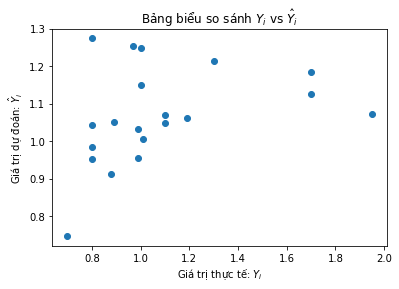

In [13]:
#Bảng biểu so sánh giá trị y dự đoán và y thực tế
plt.scatter(Y_test, Y_pred)
plt.xlabel("Giá trị thực tế: $Y_i$")
plt.ylabel("Giá trị dự đoán: $\hat{Y}_i$")
plt.title("Bảng biểu so sánh $Y_i$ vs $\hat{Y}_i$")
plt.show()